# Final Project Jose Luna Jr.

### This is the overdamped case when f(t) is equal to zero. In this case the displacement decreases quickly and could represent a stiff suspension system for example.

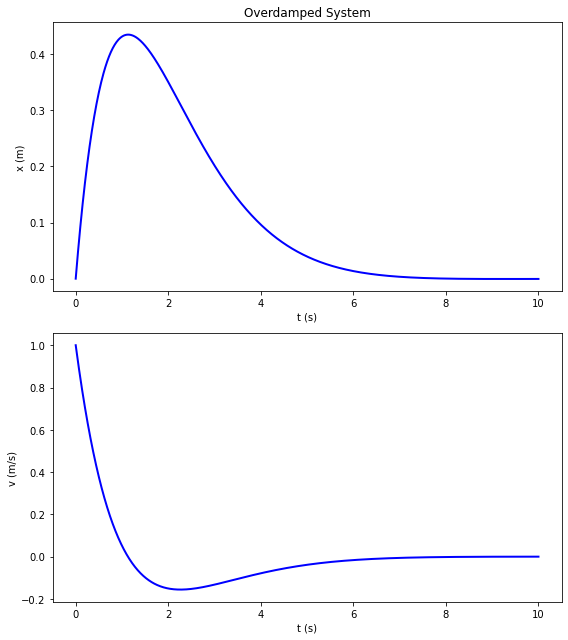

In [19]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

#𝑥¨+2𝜁𝜔𝑛𝑥˙+𝜔2𝑛𝑥=𝐹(𝑡)𝑚
zeta = 1.1
omega_n= 1
#RK3 constants
c1 = 1./6
c2 = 1./3
c3 = 1./3
c4 = 1./6
a2 = 1./2
a3 = 1.
a4 = 3/2
b21 = 1./2
b31 = -1.
b32 = 2.
b41 = 1
b42 = 3

F_over_m = lambda t:  0       
f_x = lambda t,x,v: v                  #this is equation for dx/dt = v t= indep. x = prim. dep. v = dep
f_v = lambda t,x,v: F_over_m(t)-2*zeta*omega_n*v - (omega_n**2)*x    #this is equation for dv/dt = F_over_m(T)-2*gamma*v- k*x
                                                # t = indep, prim. dep = v x is also dep.
def rk4_x(ti, xi, vi, dt):
    K1 = f_x(ti,xi,vi)
    K2 = f_x(ti+a2*dt,xi+b21*K1*dt,vi)
    K3 = f_x(ti+a3*dt,xi+b31*K1*dt+b32*K2*dt,vi)
    K4 = f_x(ti+a4*dt,xi+b41*K1*dt+b42*K2*dt,vi)
    xip1 = xi+(c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return xip1

def rk4_v(ti, xi, vi, dt):
    K1 = f_v(ti,xi,vi)
    K2 = f_v(ti+a2*dt,xi,vi+b21*K1*dt)
    K3 = f_v(ti+a3*dt,xi,vi+b31*K1*dt+b32*K2*dt)
    K4 = f_x(ti+a4*dt,xi+b41*K1*dt+b42*K2*dt,vi)
    vip1 = vi+(c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return vip1

ti = 0.0    #initial value for t
tf = 10    #final value for t
n = 1000 #number of segments
dt = (tf-ti)/n   #step size
t = np.zeros(n+1)
x = np.zeros(n+1)
v = np.zeros(n+1)
x_iv = 0.0 #m
v_iv = 1.0 #m/s
t[0] = ti      #initial condition
x[0] = x_iv
v[0] = v_iv

for i in range(1,n+1):
    t[i] = ti + i*dt
    x[i] = rk4_x(t[i-1],x[i-1],v[i-1],dt)
    v[i] = rk4_v(t[i-1],x[i-1],v[i-1],dt)

    
fig = plt.figure(figsize=(8,9))
ax1 = plt.subplot(211)
plt.title("Overdamped System")
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.xlabel("t (s)")
plt.ylabel("x (m)")

ax2 = plt.subplot(212,sharex=ax1)
plt.plot(t,v,label="v vs. t",color="b",linewidth="2.0")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")

plt.tight_layout()
plt.show()

### This is the critically damped case when f(t) is equal to zero. In this case zeta is equal to zero which means the critical damping constant is equal to the damping constant and usually makes for an ideal scenario. The spring would return to equilibrium less quickly than the overdamped case.

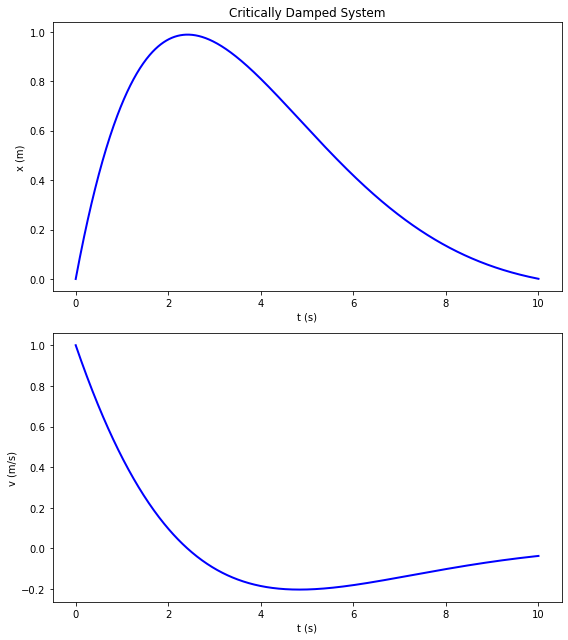

In [22]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

#𝑥¨+2𝜁𝜔𝑛𝑥˙+𝜔2𝑛𝑥=𝐹(𝑡)𝑚
zeta = 1
omega_n= .5
#RK3 constants
c1 = 1./6
c2 = 1./3
c3 = 1./3
c4 = 1./6
a2 = 1./2
a3 = 1.
a4 = 3/2
b21 = 1./2
b31 = -1.
b32 = 2.
b41 = 1
b42 = 3

F_over_m = lambda t:  0       
f_x = lambda t,x,v: v                  #this is equation for dx/dt = v t= indep. x = prim. dep. v = dep
f_v = lambda t,x,v: F_over_m(t)-2*zeta*omega_n*v - (omega_n**2)*x    #this is equation for dv/dt = F_over_m(T)-2*gamma*v- k*x
                                                # t = indep, prim. dep = v x is also dep.
def rk4_x(ti, xi, vi, dt):
    K1 = f_x(ti,xi,vi)
    K2 = f_x(ti+a2*dt,xi+b21*K1*dt,vi)
    K3 = f_x(ti+a3*dt,xi+b31*K1*dt+b32*K2*dt,vi)
    K4 = f_x(ti+a4*dt,xi+b41*K1*dt+b42*K2*dt,vi)
    xip1 = xi+(c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return xip1

def rk4_v(ti, xi, vi, dt):
    K1 = f_v(ti,xi,vi)
    K2 = f_v(ti+a2*dt,xi,vi+b21*K1*dt)
    K3 = f_v(ti+a3*dt,xi,vi+b31*K1*dt+b32*K2*dt)
    K4 = f_x(ti+a4*dt,xi+b41*K1*dt+b42*K2*dt,vi)
    vip1 = vi+(c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return vip1

ti = 0.0    #initial value for t
tf = 10    #final value for t
n = 1000 #number of segments
dt = (tf-ti)/n   #step size
t = np.zeros(n+1)
x = np.zeros(n+1)
v = np.zeros(n+1)
x_iv = 0.0 #m
v_iv = 1.0 #m/s
t[0] = ti      #initial condition
x[0] = x_iv
v[0] = v_iv

for i in range(1,n+1):
    t[i] = ti + i*dt
    x[i] = rk4_x(t[i-1],x[i-1],v[i-1],dt)
    v[i] = rk4_v(t[i-1],x[i-1],v[i-1],dt)

    
fig = plt.figure(figsize=(8,9))
ax1 = plt.subplot(211)
plt.title("Critically Damped System")
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.xlabel("t (s)")
plt.ylabel("x (m)")

ax2 = plt.subplot(212,sharex=ax1)
plt.plot(t,v,label="v vs. t",color="b",linewidth="2.0")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")

plt.tight_layout()
plt.show()

### This is the underdamped system. An underdamped system will always have a zeta of less than 1. This causes the spring to oscillate because it overshoots the equilibrium point multiple times until it loses all of its energy. This is not an ideal case for a suspension system.

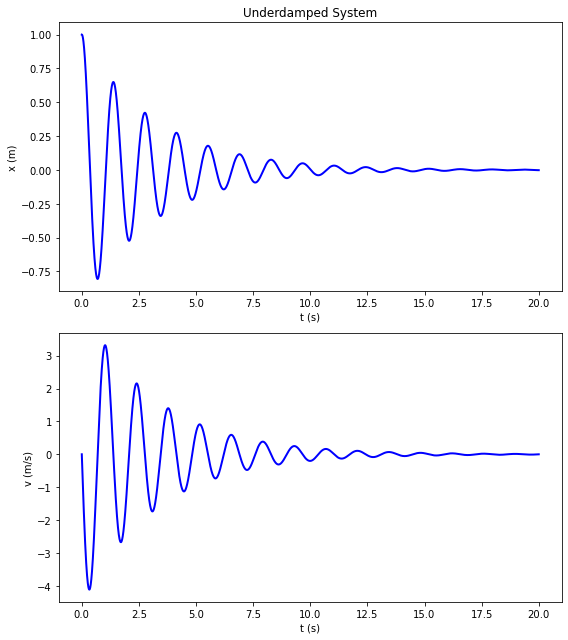

In [53]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

#𝑥¨+2𝜁𝜔𝑛𝑥˙+𝜔2𝑛𝑥=𝐹(𝑡)𝑚
zeta = .1
omega_n= 5
#RK3 constants
c1 = 1./6
c2 = 1./3
c3 = 1./3
c4 = 1./6
a2 = 1./2
a3 = 1.
a4 = 3/2
b21 = 1./2
b31 = -1.
b32 = 2.
b41 = 1
b42 = 3

F_over_m = lambda t:  0      
f_x = lambda t,x,v: v                  #this is equation for dx/dt = v t= indep. x = prim. dep. v = dep
f_v = lambda t,x,v: F_over_m(t)-2*zeta*omega_n*v - (omega_n**2)*x    #this is equation for dv/dt = F_over_m(T)-2*gamma*v- k*x
                                                # t = indep, prim. dep = v x is also dep.
def rk4_x(ti, xi, vi, dt):
    K1 = f_x(ti,xi,vi)
    K2 = f_x(ti+a2*dt,xi+b21*K1*dt,vi)
    K3 = f_x(ti+a3*dt,xi+b31*K1*dt+b32*K2*dt,vi)
    K4 = f_x(ti+a4*dt,xi+b41*K1*dt+b42*K2*dt,vi)
    xip1 = xi+(c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return xip1

def rk4_v(ti, xi, vi, dt):
    K1 = f_v(ti,xi,vi)
    K2 = f_v(ti+a2*dt,xi,vi+b21*K1*dt)
    K3 = f_v(ti+a3*dt,xi,vi+b31*K1*dt+b32*K2*dt)
    K4 = f_x(ti+a4*dt,xi+b41*K1*dt+b42*K2*dt,vi)
    vip1 = vi+(c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return vip1

ti = 0.0    #initial value for t
tf = 20    #final value for t
n = 10000 #number of segments
dt = (tf-ti)/n   #step size
t = np.zeros(n+1)
x = np.zeros(n+1)
v = np.zeros(n+1)
x_iv = 1.0 #m
v_iv = 0.0 #m/s
t[0] = ti      #initial condition
x[0] = x_iv
v[0] = v_iv

for i in range(1,n+1):
    t[i] = ti + i*dt
    x[i] = rk4_x(t[i-1],x[i-1],v[i-1],dt)
    v[i] = rk4_v(t[i-1],x[i-1],v[i-1],dt)

    
fig = plt.figure(figsize=(8,9))
ax1 = plt.subplot(211)
plt.title("Underdamped System")
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.xlabel("t (s)")
plt.ylabel("x (m)")

ax2 = plt.subplot(212,sharex=ax1)
plt.plot(t,v,label="v vs. t",color="b",linewidth="2.0")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")

plt.tight_layout()
plt.show()

### This code represents an over damped system with a variety of different values for f(t) and how it affects the damping of the system. As seen in the graph it has a huge difference in that it affects where the ending displacement will be.

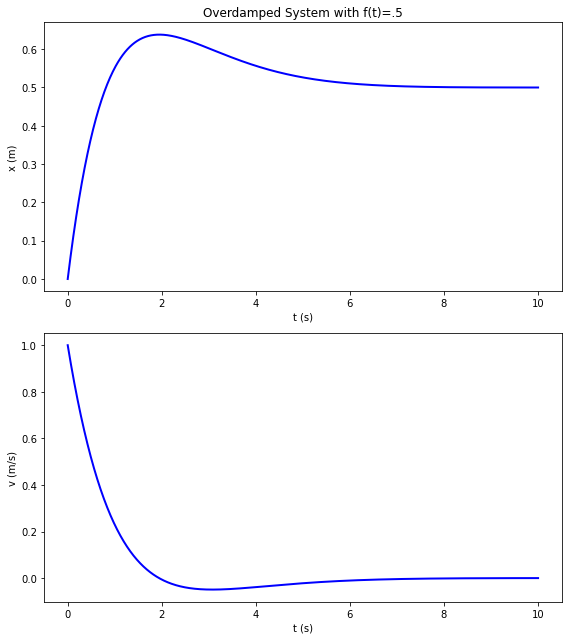

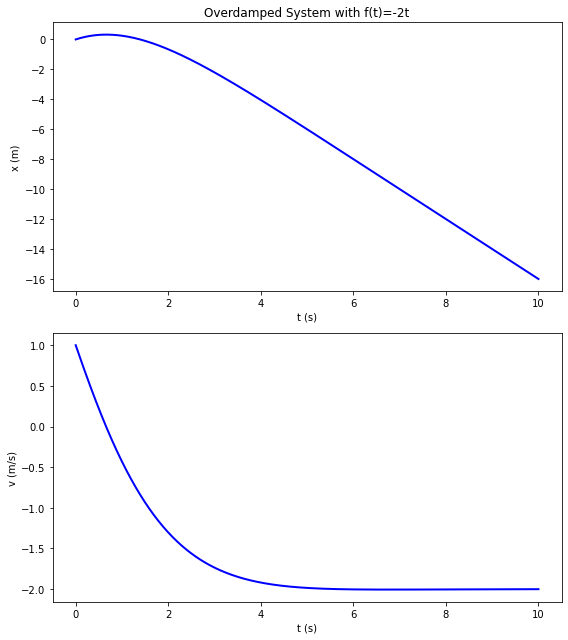

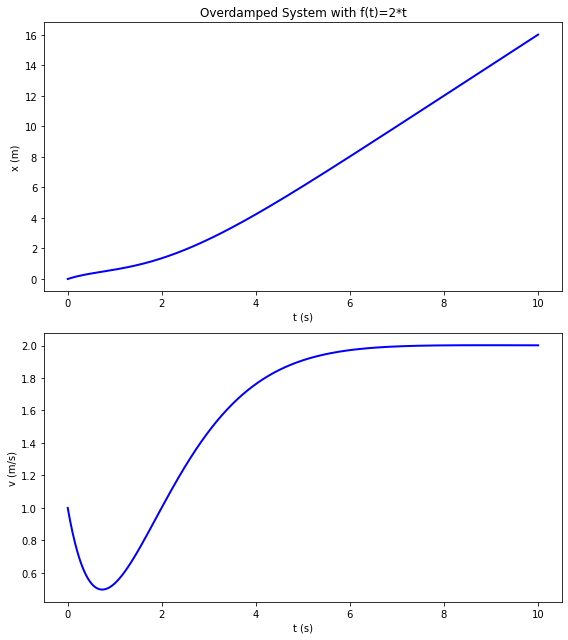

In [40]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

#𝑥¨+2𝜁𝜔𝑛𝑥˙+𝜔2𝑛𝑥=𝐹(𝑡)𝑚
zeta = 1.1
omega_n= 1
#RK3 constants
c1 = 1./6
c2 = 1./3
c3 = 1./3
c4 = 1./6
a2 = 1./2
a3 = 1.
a4 = 3/2
b21 = 1./2
b31 = -1.
b32 = 2.
b41 = 1
b42 = 3

F_over_m = lambda t:  .5       
f_x = lambda t,x,v: v                  #this is equation for dx/dt = v t= indep. x = prim. dep. v = dep
f_v = lambda t,x,v: F_over_m(t)-2*zeta*omega_n*v - (omega_n**2)*x    #this is equation for dv/dt = F_over_m(T)-2*gamma*v- k*x
                                                # t = indep, prim. dep = v x is also dep.
def rk4_x(ti, xi, vi, dt):
    K1 = f_x(ti,xi,vi)
    K2 = f_x(ti+a2*dt,xi+b21*K1*dt,vi)
    K3 = f_x(ti+a3*dt,xi+b31*K1*dt+b32*K2*dt,vi)
    K4 = f_x(ti+a4*dt,xi+b41*K1*dt+b42*K2*dt,vi)
    xip1 = xi+(c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return xip1

def rk4_v(ti, xi, vi, dt):
    K1 = f_v(ti,xi,vi)
    K2 = f_v(ti+a2*dt,xi,vi+b21*K1*dt)
    K3 = f_v(ti+a3*dt,xi,vi+b31*K1*dt+b32*K2*dt)
    K4 = f_x(ti+a4*dt,xi+b41*K1*dt+b42*K2*dt,vi)
    vip1 = vi+(c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return vip1

ti = 0.0    #initial value for t
tf = 10    #final value for t
n = 1000 #number of segments
dt = (tf-ti)/n   #step size
t = np.zeros(n+1)
x = np.zeros(n+1)
v = np.zeros(n+1)
x_iv = 0.0 #m
v_iv = 1.0 #m/s
t[0] = ti      #initial condition
x[0] = x_iv
v[0] = v_iv

for i in range(1,n+1):
    t[i] = ti + i*dt
    x[i] = rk4_x(t[i-1],x[i-1],v[i-1],dt)
    v[i] = rk4_v(t[i-1],x[i-1],v[i-1],dt)

    
fig = plt.figure(figsize=(8,9))
ax1 = plt.subplot(211)
plt.title("Overdamped System with f(t)=.5")
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.xlabel("t (s)")
plt.ylabel("x (m)")

ax2 = plt.subplot(212,sharex=ax1)
plt.plot(t,v,label="v vs. t",color="b",linewidth="2.0")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")

plt.tight_layout()
plt.show()

F_over_m = lambda t:  -2*t     
f_x = lambda t,x,v: v                  #this is equation for dx/dt = v t= indep. x = prim. dep. v = dep
f_v = lambda t,x,v: F_over_m(t)-2*zeta*omega_n*v - (omega_n**2)*x    #this is equation for dv/dt = F_over_m(T)-2*gamma*v- k*x
                                                # t = indep, prim. dep = v x is also dep.
def rk4_x(ti, xi, vi, dt):
    K1 = f_x(ti,xi,vi)
    K2 = f_x(ti+a2*dt,xi+b21*K1*dt,vi)
    K3 = f_x(ti+a3*dt,xi+b31*K1*dt+b32*K2*dt,vi)
    K4 = f_x(ti+a4*dt,xi+b41*K1*dt+b42*K2*dt,vi)
    xip1 = xi+(c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return xip1

def rk4_v(ti, xi, vi, dt):
    K1 = f_v(ti,xi,vi)
    K2 = f_v(ti+a2*dt,xi,vi+b21*K1*dt)
    K3 = f_v(ti+a3*dt,xi,vi+b31*K1*dt+b32*K2*dt)
    K4 = f_x(ti+a4*dt,xi+b41*K1*dt+b42*K2*dt,vi)
    vip1 = vi+(c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return vip1

ti = 0.0    #initial value for t
tf = 10    #final value for t
n = 1000 #number of segments
dt = (tf-ti)/n   #step size
t = np.zeros(n+1)
x = np.zeros(n+1)
v = np.zeros(n+1)
x_iv = 0.0 #m
v_iv = 1.0 #m/s
t[0] = ti      #initial condition
x[0] = x_iv
v[0] = v_iv

for i in range(1,n+1):
    t[i] = ti + i*dt
    x[i] = rk4_x(t[i-1],x[i-1],v[i-1],dt)
    v[i] = rk4_v(t[i-1],x[i-1],v[i-1],dt)

    
fig = plt.figure(figsize=(8,9))
ax1 = plt.subplot(211)
plt.title("Overdamped System with f(t)=-2t")
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.xlabel("t (s)")
plt.ylabel("x (m)")

ax2 = plt.subplot(212,sharex=ax1)
plt.plot(t,v,label="v vs. t",color="b",linewidth="2.0")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")

plt.tight_layout()
plt.show()

F_over_m = lambda t:  2*t       
f_x = lambda t,x,v: v                  #this is equation for dx/dt = v t= indep. x = prim. dep. v = dep
f_v = lambda t,x,v: F_over_m(t)-2*zeta*omega_n*v - (omega_n**2)*x    #this is equation for dv/dt = F_over_m(T)-2*gamma*v- k*x
                                                # t = indep, prim. dep = v x is also dep.
def rk4_x(ti, xi, vi, dt):
    K1 = f_x(ti,xi,vi)
    K2 = f_x(ti+a2*dt,xi+b21*K1*dt,vi)
    K3 = f_x(ti+a3*dt,xi+b31*K1*dt+b32*K2*dt,vi)
    K4 = f_x(ti+a4*dt,xi+b41*K1*dt+b42*K2*dt,vi)
    xip1 = xi+(c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return xip1

def rk4_v(ti, xi, vi, dt):
    K1 = f_v(ti,xi,vi)
    K2 = f_v(ti+a2*dt,xi,vi+b21*K1*dt)
    K3 = f_v(ti+a3*dt,xi,vi+b31*K1*dt+b32*K2*dt)
    K4 = f_x(ti+a4*dt,xi+b41*K1*dt+b42*K2*dt,vi)
    vip1 = vi+(c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return vip1

ti = 0.0    #initial value for t
tf = 10    #final value for t
n = 1000 #number of segments
dt = (tf-ti)/n   #step size
t = np.zeros(n+1)
x = np.zeros(n+1)
v = np.zeros(n+1)
x_iv = 0.0 #m
v_iv = 1.0 #m/s
t[0] = ti      #initial condition
x[0] = x_iv
v[0] = v_iv

for i in range(1,n+1):
    t[i] = ti + i*dt
    x[i] = rk4_x(t[i-1],x[i-1],v[i-1],dt)
    v[i] = rk4_v(t[i-1],x[i-1],v[i-1],dt)

    
fig = plt.figure(figsize=(8,9))
ax1 = plt.subplot(211)
plt.title("Overdamped System with f(t)=2*t")
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.xlabel("t (s)")
plt.ylabel("x (m)")

ax2 = plt.subplot(212,sharex=ax1)
plt.plot(t,v,label="v vs. t",color="b",linewidth="2.0")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")

plt.tight_layout()
plt.show()

### This is is an underdamped system with resonance which means the frequency with which the spring is oscillating is close to or the same as the natural frequency which will cause strong growing oscillations as seen in the graph.

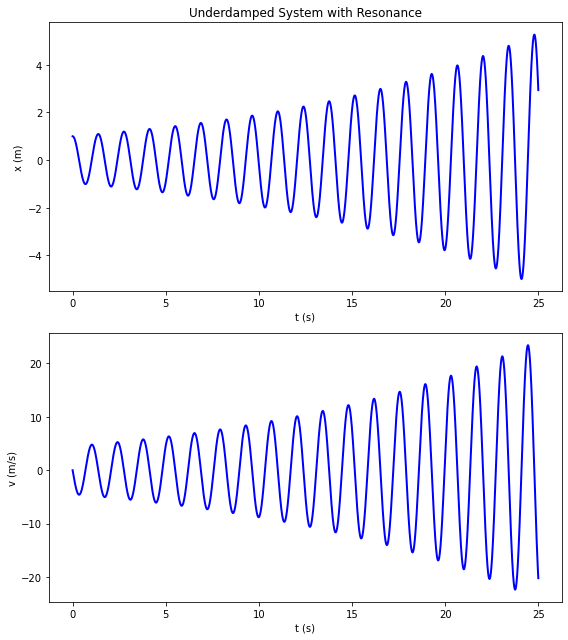

In [98]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt

#𝑥¨+2𝜁𝜔𝑛𝑥˙+𝜔2𝑛𝑥=𝐹(𝑡)𝑚
zeta = .01
omega_n= 5
#RK3 constants
c1 = 1./6
c2 = 1./3
c3 = 1./3
c4 = 1./6
a2 = 1./2
a3 = 1.
a4 = 3/2
b21 = 1./2
b31 = -1.
b32 = 2.
b41 = 1
b42 = 3

F_over_m = lambda t: .5*cos(omega_n/20*t)    
f_x = lambda t,x,v: v                  #this is equation for dx/dt = v t= indep. x = prim. dep. v = dep
f_v = lambda t,x,v: F_over_m(t)-2*zeta*omega_n*v - (omega_n**2)*x    #this is equation for dv/dt = F_over_m(T)-2*gamma*v- k*x
                                                # t = indep, prim. dep = v x is also dep.
def rk4_x(ti, xi, vi, dt):
    K1 = f_x(ti,xi,vi)
    K2 = f_x(ti+a2*dt,xi+b21*K1*dt,vi)
    K3 = f_x(ti+a3*dt,xi+b31*K1*dt+b32*K2*dt,vi)
    K4 = f_x(ti+a4*dt,xi+b41*K1*dt+b42*K2*dt,vi)
    xip1 = xi+(c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return xip1

def rk4_v(ti, xi, vi, dt):
    K1 = f_v(ti,xi,vi)
    K2 = f_v(ti+a2*dt,xi,vi+b21*K1*dt)
    K3 = f_v(ti+a3*dt,xi,vi+b31*K1*dt+b32*K2*dt)
    K4 = f_x(ti+a4*dt,xi+b41*K1*dt+b42*K2*dt,vi)
    vip1 = vi+(c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return vip1

ti = 0.0    #initial value for t
tf = 25    #final value for t
n = 10000 #number of segments
dt = (tf-ti)/n   #step size
t = np.zeros(n+1)
x = np.zeros(n+1)
v = np.zeros(n+1)
x_iv = 1.0 #m
v_iv = 0.0 #m/s
t[0] = ti      #initial condition
x[0] = x_iv
v[0] = v_iv

for i in range(1,n+1):
    t[i] = ti + i*dt
    x[i] = rk4_x(t[i-1],x[i-1],v[i-1],dt)
    v[i] = rk4_v(t[i-1],x[i-1],v[i-1],dt)

    
fig = plt.figure(figsize=(8,9))
ax1 = plt.subplot(211)
plt.title("Underdamped System with Resonance")
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.xlabel("t (s)")
plt.ylabel("x (m)")

ax2 = plt.subplot(212,sharex=ax1)
plt.plot(t,v,label="v vs. t",color="b",linewidth="2.0")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")

plt.tight_layout()
plt.show()